In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset using pandas read_csv()
Ratings=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CLIENTS/5. Miki/4th/Ratings.csv')
SMB=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/CLIENTS/5. Miki/4th/SMB.xlsx')
trial_date=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CLIENTS/5. Miki/4th/trial_date.csv')

# Data assessing for credibility

##Trail date data

In [ ]:
trial_date.head()

,ProductDisplayName,PublisherName,HasFreeTrials,HasFreePlans,TrialCustomers,ConvertedCustomers,AvgTimeToConvert,MedianTimeToConvert,TrialConversionRate
0,Twilio SendGrid,SendGrid,False,True,40101,6471,346.648165,0,0.16
1,Elastic Search (Elasticsearch) – An Azure Nati...,Elastic,False,True,5782,3537,161.450126,0,0.61
2,Ubuntu Pro 18.04 LTS,Canonical,True,True,3427,1076,977.716390,743,0.31
3,IonQ Quantum Computer,IonQ Inc,False,True,2760,5,886.000000,5,0.00
4,Quantinuum H-Series Quantum Computer,Quantinuum LLC,False,True,2580,1,2204.000000,2204,0.00


In [ ]:
trial_date.shape

(1097, 9)

In [ ]:
trial_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097 entries, 0 to 1096
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ProductDisplayName   1097 non-null   object 
 1   PublisherName        1097 non-null   object 
 2   HasFreeTrials        1097 non-null   bool   
 3   HasFreePlans         1097 non-null   bool   
 4   TrialCustomers       1097 non-null   int64  
 5   ConvertedCustomers   1097 non-null   int64  
 6   AvgTimeToConvert     1097 non-null   float64
 7   MedianTimeToConvert  1097 non-null   int64  
 8   TrialConversionRate  1097 non-null   float64
dtypes: bool(2), float64(2), int64(3), object(2)
memory usage: 62.3+ KB


In [ ]:
duplicated_rows=trial_date[trial_date.duplicated()]
duplicated_rows.shape[0]

8

In [ ]:
trial_date.drop_duplicates(inplace=True)

In [ ]:
trial_date.shape

(1089, 9)

In [ ]:
trial_date['ProductDisplayName'].nunique()

1022

In [ ]:
trial_date['PublisherName'].nunique()

566



---



##Bussiness levels

In [ ]:
SMB.head()

,Customer ID,Summary Segment
0,00003a6a-84a3-5bfb-a97e-25512c644d78,SMB
1,0000d587-ec7b-5fbd-c8f5-4f859485284b,SMB
2,00011e5d-a1a9-5f2a-c136-87c4b3b1fb1d,SMB
3,00011f63-1ea9-5d8a-957a-fd240754cfd0,SMB
4,00023416-e8c9-5f9e-2b2a-f376dfc793ee,SMB


In [ ]:
SMB.shape

(167164, 2)

In [ ]:
SMB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167164 entries, 0 to 167163
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Customer ID      167164 non-null  object
 1   Summary Segment  167163 non-null  object
dtypes: object(2)
memory usage: 2.6+ MB


In [ ]:
SMB.isna().sum()

Customer ID        0
Summary Segment    1
dtype: int64

In [ ]:
SMB.dropna(inplace=True)
SMB.isna().sum()

Customer ID        0
Summary Segment    0
dtype: int64

In [ ]:
duplicated_rows=SMB[SMB.duplicated()]
duplicated_rows.shape[0]

0

In [ ]:
SMB['Summary Segment'].value_counts()

SMB           124664
SMC-C          28449
Enterprise     14050
Name: Summary Segment, dtype: int64

In [ ]:
SMB['Customer ID'].nunique()

148191



---



# Ratings data

In [ ]:
Ratings.head()

,PublisherName,ProductDisplayName,HasFreePlans,HasFreeTrials,IsLive,IsTransactableInclusivePrivateBusiness,IsThirdParty,CPPAppId,TrialCustomers,ConvertedCustomers,TotalRevenue,TrialConversionRate,AvgStarRatingExternal,AvgStarRatingMarketplace,sumNumberOfRatingsExternal,sumNumberOfRatingsMarketplace
0,SendGrid,Twilio SendGrid,True,False,True,True,True,sendgrid.tsg-saas-offer,63065.0,18162.0,6.420244e+07,0.29,4.024455,4.156260,1313,1252
1,Canonical,Ubuntu Pro 22.04 LTS,True,True,True,True,True,canonical.0001-com-ubuntu-pro-jammy,1824.0,638.0,1.367624e+05,0.35,4.743257,4.743257,1001,1000
2,TeamViewer Germany GmbH,TeamViewer Tensor,True,False,True,True,True,teamviewergmbh.sol-2695-zoo,3.0,1.0,1.073386e+00,0.33,4.624376,4.624751,1001,1001
3,Tableau,Tableau Server,True,False,True,False,True,tableau.tableau-server,NaN,NaN,NaN,NaN,4.655345,4.655683,1001,1001
4,airSlate,signNow,True,True,True,True,True,airslate.signnow,34.0,25.0,2.844678e+04,0.74,4.711000,NaN,1000,1000


In [ ]:
Ratings['ProductDisplayName'].nunique()

11417

In [ ]:
Ratings.shape

(20916, 16)

In [ ]:
Ratings.isna().sum()

PublisherName                                 0
ProductDisplayName                            0
HasFreePlans                                  0
HasFreeTrials                                 0
IsLive                                        0
IsTransactableInclusivePrivateBusiness     3199
IsThirdParty                                  0
CPPAppId                                      0
TrialCustomers                            13914
ConvertedCustomers                        13914
TotalRevenue                              13914
TrialConversionRate                       13914
AvgStarRatingExternal                     19835
AvgStarRatingMarketplace                  20292
sumNumberOfRatingsExternal                    0
sumNumberOfRatingsMarketplace                 0
dtype: int64

In [ ]:
Ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20916 entries, 0 to 20915
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   PublisherName                           20916 non-null  object 
 1   ProductDisplayName                      20916 non-null  object 
 2   HasFreePlans                            20916 non-null  bool   
 3   HasFreeTrials                           20916 non-null  bool   
 4   IsLive                                  20916 non-null  bool   
 5   IsTransactableInclusivePrivateBusiness  17717 non-null  object 
 6   IsThirdParty                            20916 non-null  bool   
 7   CPPAppId                                20916 non-null  object 
 8   TrialCustomers                          7002 non-null   float64
 9   ConvertedCustomers                      7002 non-null   float64
 10  TotalRevenue                            7002 non-null   fl



---



---



# Analysis of new data

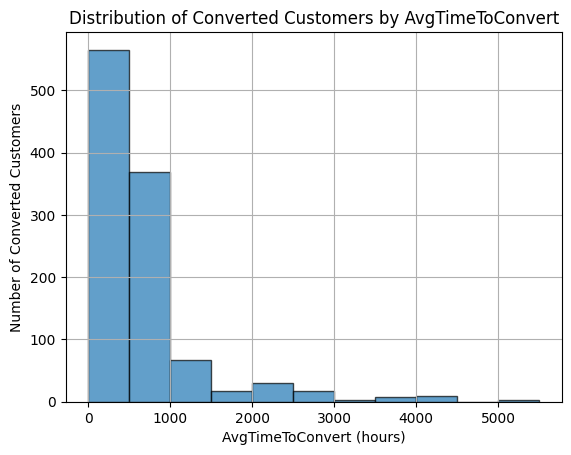

In [ ]:
# Define the range for AvgTimeToConvert
time_bins = np.arange(0, 6000, 500)

# Create a histogram based on the AvgTimeToConvert ranges
plt.hist(trial_date['AvgTimeToConvert'], bins=time_bins, edgecolor='black', alpha=0.7)

# Add labels and title
plt.title('Distribution of Converted Customers by AvgTimeToConvert')
plt.xlabel('AvgTimeToConvert (hours)')
plt.ylabel('Number of Converted Customers')

plt.grid(True)
plt.show()

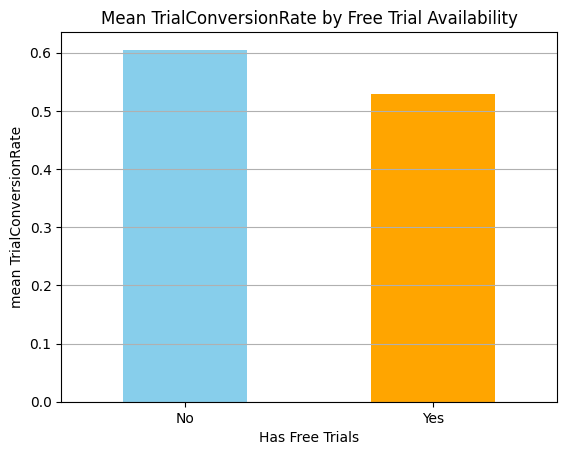

In [ ]:
# Group the data by the 'HasFreeTrials' column and calculate the sum of 'ConvertedCustomers' for each group
converted_by_trial = trial_date.groupby('HasFreeTrials')['TrialConversionRate'].mean()

# Plotting the bar chart
converted_by_trial.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Mean TrialConversionRate by Free Trial Availability')
plt.xlabel('Has Free Trials')
plt.ylabel('mean TrialConversionRate')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.grid(axis='y')
plt.show()

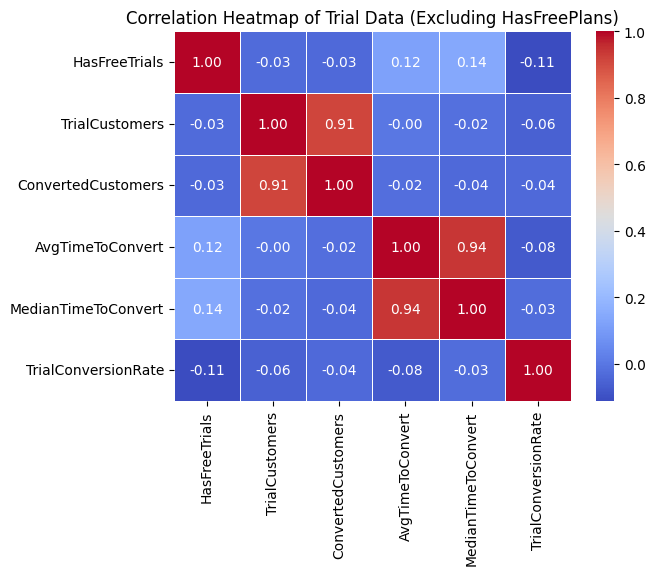

In [ ]:
# Drop the 'HasFreePlans' column
trial_data_no_free_plans = trial_date.drop(columns=['HasFreePlans'])

# Calculate the correlation matrix
correlation_matrix = trial_data_no_free_plans.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Trial Data (Excluding HasFreePlans)')
plt.show()

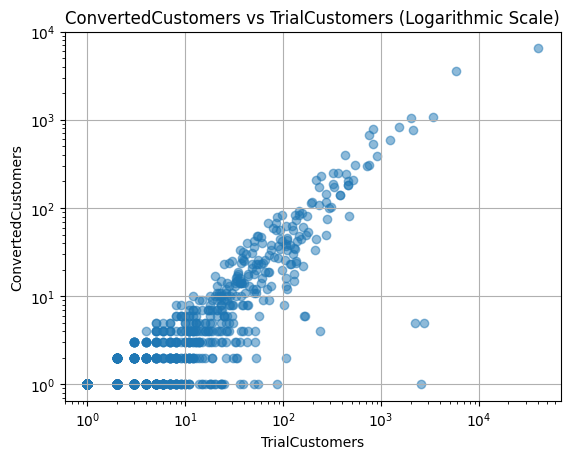

In [ ]:
# Plot scatter plot with logarithmic scaling
plt.scatter(trial_date['TrialCustomers'], trial_date['ConvertedCustomers'], alpha=0.5)
plt.title('ConvertedCustomers vs TrialCustomers (Logarithmic Scale)')
plt.xlabel('TrialCustomers')
plt.ylabel('ConvertedCustomers')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

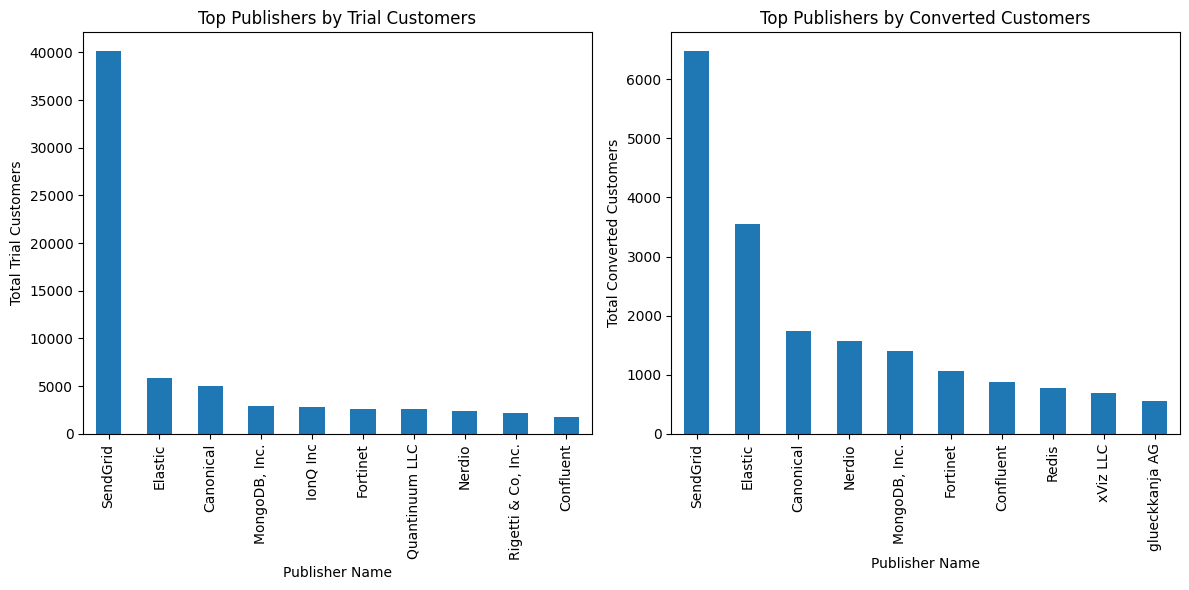

In [ ]:
top_publishers_trial = trial_date.groupby('PublisherName')['TrialCustomers'].sum().nlargest(10)
top_publishers_converted = trial_date.groupby('PublisherName')['ConvertedCustomers'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
top_publishers_trial.plot(kind='bar')
plt.title('Top Publishers by Trial Customers')
plt.xlabel('Publisher Name')
plt.ylabel('Total Trial Customers')

plt.subplot(1, 2, 2)
top_publishers_converted.plot(kind='bar')
plt.title('Top Publishers by Converted Customers')
plt.xlabel('Publisher Name')
plt.ylabel('Total Converted Customers')

plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

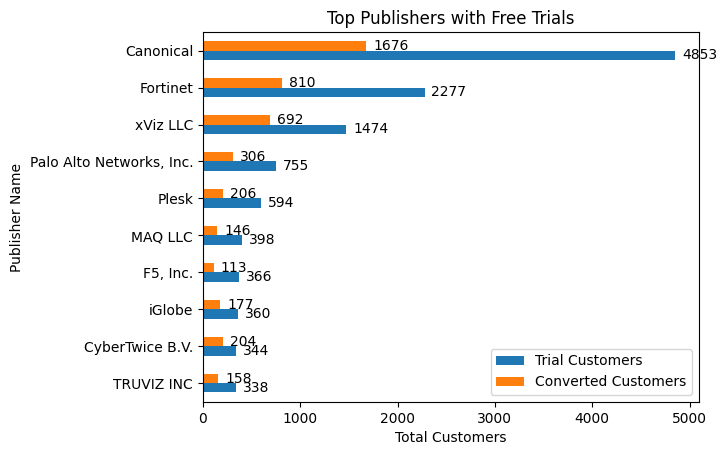

In [ ]:
top_publishers_free_trials = trial_date[trial_date['HasFreeTrials']].groupby('PublisherName')['TrialCustomers', 'ConvertedCustomers'].sum().nlargest(10, columns='TrialCustomers')

# Sort the data in descending order
top_publishers_free_trials_sorted = top_publishers_free_trials.sort_values(by='TrialCustomers', ascending=True)

plt.figure(figsize=(12, 8))
ax = top_publishers_free_trials_sorted.plot(kind='barh', stacked=False)
plt.title('Top Publishers with Free Trials')
plt.ylabel('Publisher Name')
plt.xlabel('Total Customers')
plt.legend(['Trial Customers', 'Converted Customers'], loc='lower right')

# Add annotations for each bar
for p in ax.patches:
    width = p.get_width()
    plt.annotate(f'{width:.0f}', (width, p.get_y() + p.get_height() / 2), ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.show()

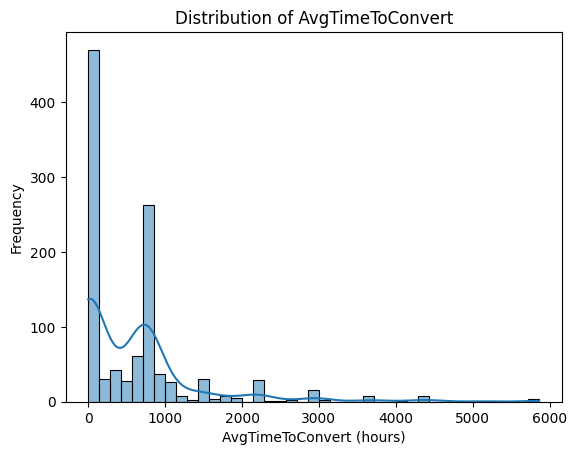

In [ ]:
sns.histplot(trial_date['AvgTimeToConvert'], kde=True)
plt.title('Distribution of AvgTimeToConvert')
plt.xlabel('AvgTimeToConvert (hours)')
plt.ylabel('Frequency')
plt.show()



---



---

